In [1]:
import random

import pandas

from tcp_fits import Call

from tcp_fits.profiles import TypeProfile

In [2]:
def random_ints_sample(size, max_abs=10000):
    return random.sample(range(-max_abs, max_abs), k=size)

In [13]:
size_range = range(1000, 8000)
profile = TypeProfile(
    [Call('set', random_ints_sample(size)) for size in size_range], Call('pop'),
    index=pandas.Index(size_range, name='List length'), loops=10, overfit=-6, fraction=0.9)

In [9]:
profile.fit_all_with(Call('polynomial', *[1, 2]))

In [10]:
profile.best_fits

,fit,degree,cost
pop,(-0.02517 ± 0.00089) + (0.00008592 ± 7.1E-7)x ...,2,0.000016


In [11]:
assert list(profile.best_fits.degree) == [1]

AssertionError: 

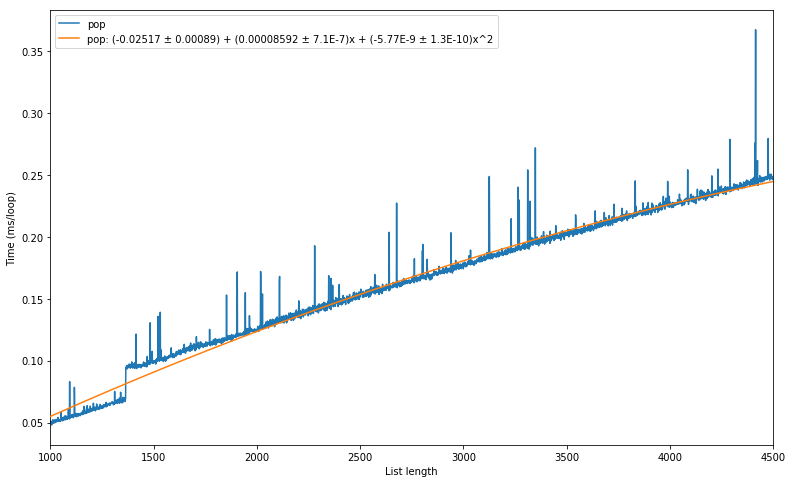

In [12]:
profile.show()